感知机是一种线性分类模型，属于判别模型。对输入的实例进行2分类（+1，-1）.
- 由输入空间到输出空间的如下函数称为感知机 
$$f(x)=sign(w \cdot x+b)$$



### 感知机学习策略
 1. 数据据的线性可分性

    即存在超平面$w \cdot x+b$ 可以将数据集的正实例点和负实例点完全正确地划分到超平面的两侧。
    
    对$y_i=+1$的实例$i$，有$w \cdot x_i+b >0$,
    
    对$y_i=-1$的实例$i$，有$w \cdot x_i+b <0$
    
    
 2. 感知机学习策略

    确定w，b即可，确定一个学习策略，即定义（经验）损失函数并将损失函数极小化。这里取损失函数为误分类点到超平面S的总距离（所有距离之和）。定义为 
    $$L(w,b) = - \sum_{x_i \in M} y_i(w \cdot x_i+b)$$

    其中M是误分类点的集合，$- y_i(w \cdot x_i+b) > 0$ ,$L(w,b)$ 是非负的

### 感知机学习算法

使用随机梯度下降法最小化损失函数:感知机学习算法是误分类驱动的。首先任意选取一个超平面$w_0,b_0$,然后用随机梯度下降法不断极小化损失函数。此过程不是一次使M中所有误分类点的梯度下降，而是一次随机选取一个误分类点使其梯度下降:
$$ w = w +\eta y_i x_i$$
$$b = b+\eta y_i$$
当实例点被误分类，即位于超平面的错误侧，则调整$w$, $b$的值，使超平面向该误分类点的一侧移动，直至误分类点被正确分类

In [2]:
import pandas as pd 
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

D:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
D:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
# 取样本点数据
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target

df.columns = [
    'sepal length', 'sepal width', 'petal length', 'petal width', 'label'
]
df.label.value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

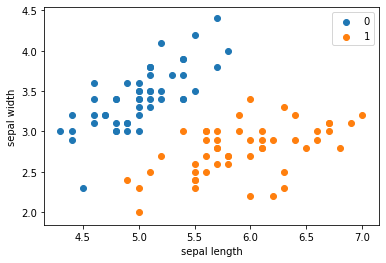

In [4]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [5]:
data = np.array(df.iloc[:100, [0, 1, -1]]) # 转为numpy
X, y = data[:,:-1], data[:,-1]
y = np.array([1 if i == 1 else -1 for i in y])


In [8]:
### 感知机

class Model:
    def __init__(self):
        self.w = np.ones(len(data[0])-1,dtype=np.float32) # 初始化w
        self.b=0
        self.lr=0.1
    def sign(self,x,w,b):
        return np.dot(x,w)+b 
    
    # sgd
    def sgd(self,X_train,y_train):
        is_wrong = False
        while not is_wrong:
            wrong_count =0
            for d in range(len(X_train)):
                X = X_train[d]
                y = y_train[d]
                if y*self.sign(X,self.w,self.b) <=0:
                    self.w = self.w +self.lr*np.dot(y,X)
                    self.b = self.b +self.lr*y
                    
                    wrong_count+=1
            if wrong_count ==0:
                is_wrong = True
        return 'Perceptron Model!'
                
                
                
            

In [11]:
perceptron = Model()
perceptron.sgd(X, y)

'Perceptron Model!'

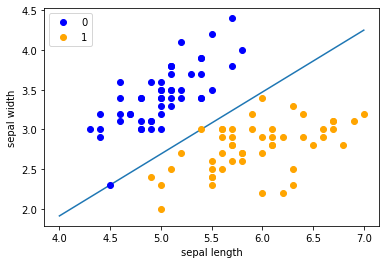

In [12]:
x_points = np.linspace(4, 7, 10)            # 取几个x点
y_ = -(perceptron.w[0] * x_points + perceptron.b) / perceptron.w[1]  # 对应的分界线的y
plt.plot(x_points, y_)

plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()